In [1]:
! pip install matplotlib
! pip install numpy
! pip install pandas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from client import ApiClient
import os

client = ApiClient(api_key=os.getenv("CRYPTICORN_API_KEY"))

In [4]:
latest_preds = client.get_latest_predictions()
df = latest_preds[latest_preds['symbol'] == 'BTCUSDT'].copy().reset_index(drop=True)
df

,id,action,course_change,symbol,timestamp,version,p10,p30,p50,p70,p90
0,747,hold,-0.486307,BTCUSDT,2024-03-19 05:00:00,2,0.997353,0.999061,0.999885,1.000885,1.000955
1,747,hold,-0.486307,BTCUSDT,2024-03-19 05:15:00,2,0.997162,0.999006,0.999968,1.001030,1.001563
2,747,hold,-0.486307,BTCUSDT,2024-03-19 05:30:00,2,0.996971,0.997488,0.998611,1.000083,1.002172
3,747,hold,-0.486307,BTCUSDT,2024-03-19 05:45:00,2,0.995200,0.995961,0.997145,1.000434,1.002780
4,747,hold,-0.486307,BTCUSDT,2024-03-19 06:00:00,2,0.996589,0.998842,1.002342,1.003595,1.004447
5,747,hold,-0.486307,BTCUSDT,2024-03-19 06:15:00,2,0.996399,0.996613,0.997923,1.001135,1.003996
6,747,hold,-0.486307,BTCUSDT,2024-03-19 06:30:00,2,0.996040,0.998673,1.002177,1.003555,1.004149
7,747,hold,-0.486307,BTCUSDT,2024-03-19 06:45:00,2,0.995681,0.998559,0.999215,1.001198,1.004301
8,747,hold,-0.486307,BTCUSDT,2024-03-19 07:00:00,2,0.992450,0.993644,0.995137,1.001230,1.004454
9,747,hold,-0.486307,BTCUSDT,2024-03-19 07:15:00,2,0.994963,0.995762,0.997320,1.001262,1.004607


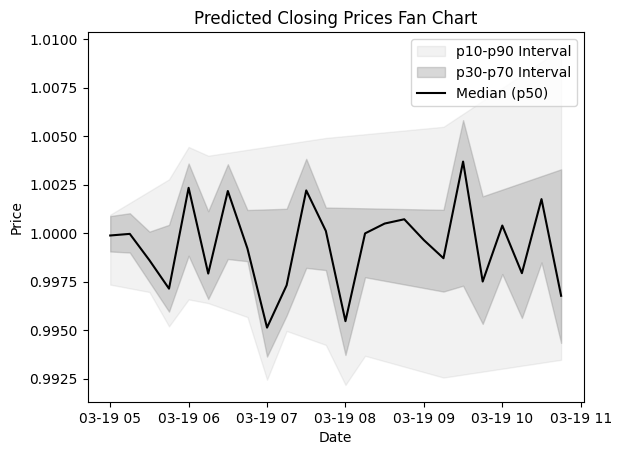

In [5]:
fig, ax = plt.subplots()

# Plotting the fan areas
ax.fill_between(df['timestamp'], df['p10'], df['p90'], color='grey', alpha=0.1, label='p10-p90 Interval')
ax.fill_between(df['timestamp'], df['p30'], df['p70'], color='grey', alpha=0.3, label='p30-p70 Interval')

# Plotting the median line
ax.plot(df['timestamp'], df['p50'], color='black', label='Median (p50)')

# Enhancements
ax.set_title('Predicted Closing Prices Fan Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

plt.show()